In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#最適解
#n_iter = 20000
#lambda = 0.001
#lam=0.0000000001

# 問題1-5

In [117]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose,lam=0.1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter+1)
        self.val_loss = np.zeros(self.iter+1)
        self.lam = lam
        np.random.seed(0)

    def fit(self, X, y, X_val=None, y_val=None):
        
        self.thita = np.random.rand(X.shape[1]+1)
        self.loss[0] = self.mean_crossentropy_error(X,y)
        if X_val is not None:
            self.val_loss[0] = self.mean_crossentropy_error(X_val,y_val)
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        for n in range(self.iter):
            self.loss[n+1] = self.gradient_descent(X,y)
            if X_val is not None:
                self.val_loss[n+1] = self.mean_crossentropy_error(X_val,y_val)
        print(self.predict_proba(X))
            
            

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def gradient_descent(self,X,y):
        
        #print(self.predict_proba(X).shape,'probashape')
        #print(y.shape,'yshape')
        #error = (self.predict_proba(X).reshape(-1,1) - y)
        error = (self.predict_proba(X) - y.flatten())
        #print('X',X.shape)
        #print(X.T.shape,'(2,75 X.Tshape)')
        #print(error.shape,'(75,1)errorshape')
        grad= np.dot(X.T,error)/X.shape[0]
        #print(grad.shape,'gradshape')
        #print(error.shape)
        #print(np.sum(error * X).shape)
        bias_grad = np.sum(error)/X.shape[0]
        l2 = self.lam * self.thita[:-1] / X.shape[0]
        #print('l2.shape',l2.shape)
        #print(grad.shape,'gradshape')
        #print(l2.shape,'l2shape')
        #print((grad + l2).shape,'grad + l2')
        self.thita[:-1] = self.thita[:-1] - self.lr * (grad + l2)#coef
        self.thita[-1] = self.thita[-1] - self.lr * bias_grad#seppen
        loss = self.mean_crossentropy_error(X,y)
        return loss
        

    def predict(self, X):
        
        return  np.where(self.predict_proba(X) >= 0.5,1,0)
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        

    def predict_proba(self, X):
        
        a = np.dot(self.thita[:-1],X.T) + self.thita[-1]
        y = self.sigmoid(a)
        #print('predict_proba.shape',y.shape)
        #print(y[:5],'予測値')
        return y
        
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return
    
    def sigmoid(self,a):
        return 1 / (1 + np.exp(-a))
    
    def mean_crossentropy_error(self,X,t):
        y = self.predict_proba(X)
        crossentropy =  -np.sum(t *  np.log(y) + (1-t) * np.log(1-y))/X.shape[0]
        l2_decay = np.sum(self.thita[:-1]**2)/(2 * X.shape[0])
        #print(crossentropy,'crossentropy')
        #print(l2_decay,'l2_decay')
        return crossentropy + l2_decay

In [118]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 問題6 学習と推定

In [119]:
from sklearn.model_selection import train_test_split
X = np.array(df_iris.iloc[:,:2])
y = np.array(iris.target)
y_mask = y != 2
y_2c = y[y_mask]
y_2c
X_2c = X[y_mask,:]

X_train,X_test,y_train,y_test = train_test_split(X_2c,y_2c,test_size=0.25,stratify=y_2c,random_state=0)

In [120]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [123]:
num_iter=50000
lr=0.0001
bias=True
verbose=True
slr = ScratchLogisticRegression(num_iter=num_iter,lr=lr,bias=bias,
                                verbose=verbose)
slr.fit(X_train,y_train.reshape(-1,1),X_test,y_test.reshape(-1,1))

[0.63018133 0.42174492 0.57714749 0.31794992 0.65508168 0.69620811
 0.43967647 0.55920475 0.45776688 0.67389473 0.38594359 0.47721795
 0.45932031 0.53201274 0.6213245  0.43130173 0.64620062 0.59639593
 0.42143978 0.36788782 0.62308939 0.4319157  0.37731388 0.63895139
 0.4037161  0.42174492 0.63018133 0.62191315 0.57745285 0.64820067
 0.54048449 0.6307644  0.66497181 0.36788782 0.60456847 0.45838816
 0.39434669 0.71965857 0.4125496  0.38475804 0.55827919 0.57928376
 0.55017198 0.45776688 0.6380849  0.73417473 0.40401737 0.61268301
 0.46779159 0.35971367 0.35971367 0.40462013 0.59488898 0.72672845
 0.4116401  0.56850548 0.4954871  0.48634796 0.64648666 0.68761272
 0.40311377 0.63837383 0.45869884 0.63924001 0.56911931 0.32565771
 0.51251781 0.30927031 0.60397001 0.35190546 0.5966971  0.4037161
 0.47721795 0.63952854 0.43130173]



In [124]:
print(y_2c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# 問題7 学習曲線のプロット

(50001,)


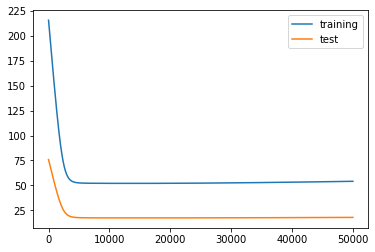

In [125]:
plt.plot(np.arange(1,len(slr.loss)+1),slr.loss,label='training')

print(slr.val_loss.shape)
plt.plot(np.arange(1,len(slr.val_loss)+1),slr.val_loss,label='test')
plt.legend()

In [126]:
slr.thita

array([ 0.36569614, -0.74390576,  0.38518448])

# 問題8 決定領域の可視化

In [127]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(Z,'Zの値')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        print(cl,'cl')
        print(idx,'idx')
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plt.legend()

[1 1 1 ... 0 0 0] Zの値
0 cl
0 idx
1 cl
1 idx
[1 1 1 ... 0 0 0] Zの値
0 cl
0 idx
1 cl
1 idx


Text(0.5, 1.0, 'test')

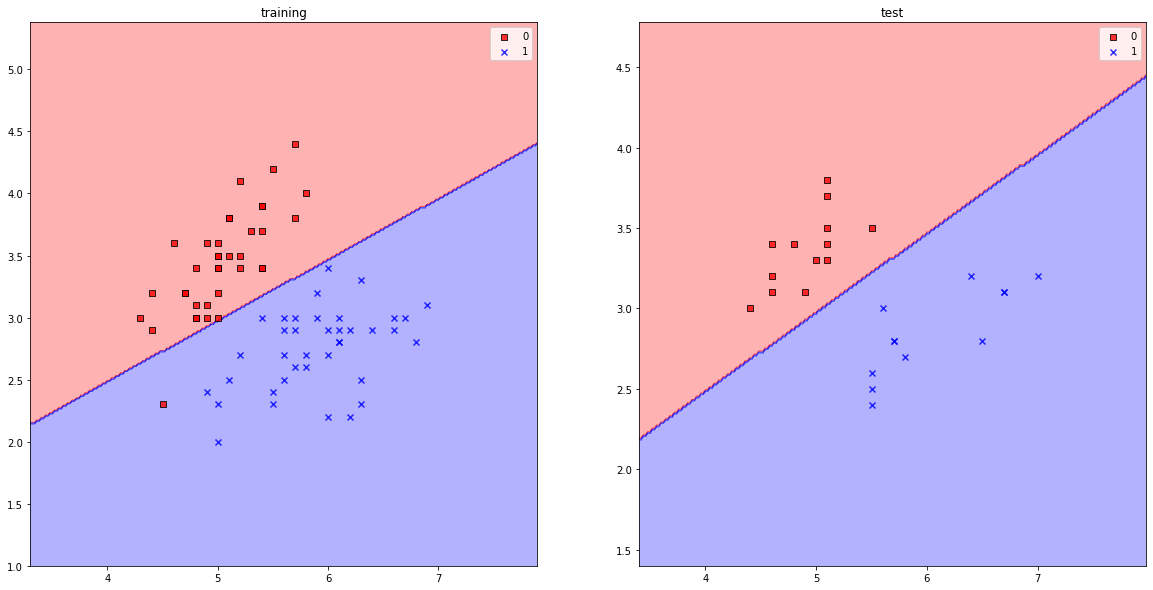

In [128]:
plt.figure(1,figsize=(20,10))
plt.subplot(1,2,1)
plot_decision_regions(X_train,y_train,slr)
plt.title('training')
plt.subplot(1,2,2)
plot_decision_regions(X_test,y_test,slr)
plt.title('test')

In [130]:
slr.predict(X_train)

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0])

# おまけ

In [131]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W),np.zeros_like(b)]
        print('grads', self.grads)
        
        
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W) + b#dot積(N,2)(2,3)=(N,3)
        #print(out.shape)
        self.x = x
        return out
    
    def backward(self, dout):
        W,b = self.params
        dW =np.dot(self.x.T, dout)#(D,H) = (D,N)(N,H) = x.t dot dout
        
        dx = np.dot(dout, W.T)#(N,D) = (N,H)(H,D)
        db = np.sum(dout,axis=0)#(1,H)
        self.grads[0][...] = dW#上書きをする必要がある
        self.grads[1][...] = db
        return dx

    

In [132]:
class SigmoidWithLoss:
    def __init__(self):
        self.params,self.grads = [],[]
        self.t = None
        self.y = None
        
    def forward(self, x, t):
        self.y = (1 / (np.exp(-x)+ 1))
        self.t = t.reshape(-1, 1)
        self.loss = -np.sum(t * np.log(self.y) + (1-t)*np.log(1-self.y))/len(self.y)
        #print('lossshape',self.loss.shape)
        return self.loss
    
    def backward(self,dout=1):
        #print(dout.shape)
        #print(self.y.shape,'yshape')
        #print(self.t.shape,'tshape')
        dx = dout * (self.y - self.t)/len(self.y)
        #print('dxshape',dx.shape)
        return dx
        #sigmoidレイヤまでの逆伝搬を実行し、affineレイヤへ伝搬を送る為
    #sumされたものを分解している。このとき。AddLayerを通ると考えられるがAddレイヤに関してはそのまま送る
    #一方でself.lossを計算する際に、len(self.y)で割っている。これは掛け算である為、この分をbackwardの際も乗算する必要がある
    
    
        
    
        
    

In [150]:
def meancrossentropyerror(y,t):
    #yが縦列N、横列それぞれの確率となってること前提
    #また、
    batch_size = t.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/batch_size

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


    

In [151]:
class LogisticNet:
    def __init__(self,input_size):
        np.random.seed(0)
        W = np.random.rand(input_size).reshape(-1,1)
        b = np.random.rand()
        self.layer =Affine(W,b)
        self.loss_layer = SigmoidWithLoss()
        print(self.loss_layer)
        #勾配とパラメータをリストにまとめる
        self.params, self.grads = [],[]
        self.params += self.layer.params
        self.grads += self.layer.grads
        
    def predict_proba(self,x):
        score = self.layer.forward(x)
        score = sigmoid(score)
        return score
    
    def predict(self, x):
        score = self.predict_proba(x)
        print('score', score)
        return np.where(score > 0.5,1,0)
        
        
    def forward(self,x,t):
        score = self.layer.forward(x)
        loss = self.loss_layer.forward(score,t)
        return loss
    
    def backward(self,dout=1):
        dout = self.loss_layer.backward(dout)
        #print('dout1', dout[:1])
        dout = self.layer.backward(dout)
        #print('dout2', dout[:1])
        return dout
        
        
        
    

In [135]:
class Trainer:
    def __init__(self, model,optimizer,n_iter):
        self.model = model
        self.optimizer = optimizer
        self.n_iter = n_iter
        self.loss = np.zeros(self.n_iter)
        
    def fit(self,x,t):
        
        model = self.model
        optimizer = self.optimizer
        
        for n in range(self.n_iter):
            self.loss[n] = self.model.forward(x,t)
            model.backward(dout=1)
            #print('before', model.params)
            optimizer.update(model.params, model.grads)
            #print('after', model.params)
            

In [156]:
class GD:
    def __init__(self,lr):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]        
        
        
class SGD:
    '''
    確率的勾配降下法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        """
        params : list of ndarray, len = 2 (W, b)
            ndarray of W : ndarray, shape(1, 2)
            b : float or np.float
        grads : paramsと同じはず
        """
        for i in range(len(params)):
            #print("i : {}, grads[i] : {}".format(i, grads[i])) # debug
            params[i] -= self.lr * grads[i] # TODO gradsが0な為計算うまくいかない
    

In [157]:
model = LogisticNet(input_size=2)
optimizer = SGD(lr = 0.0001)
trainer = Trainer(model,optimizer,n_iter = 50000)
trainer.fit(X_2c,y_2c)



grads [array([[0.],
       [0.]]), array(0.)]


In [138]:
layer = SigmoidWithLoss()
layer

In [139]:
trainer.loss

array([291.40968562, 291.31586879, 291.22205417, ...,  71.96931652,
        71.96943897,  71.96956143])

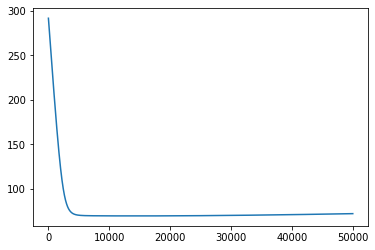

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(trainer.loss) + 1), trainer.loss)

score [[0.72043068]
 [0.72178194]
 [0.72312918]
 ...
 [0.2949918 ]
 [0.29639108]
 [0.29779418]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]] Zの値
0 cl
0 idx
1 cl
1 idx


Text(0.5, 1.0, 'training')

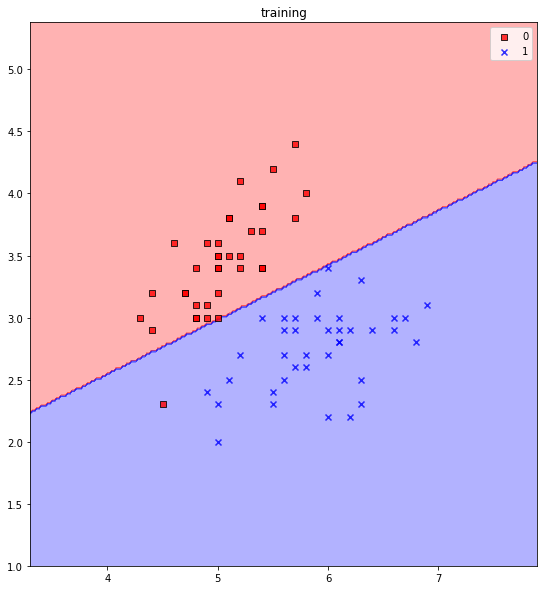

In [159]:
plt.figure(1,figsize=(20,10))
plt.subplot(1,2,1)
plot_decision_regions(X_train,y_train,model)
plt.title('training')